Github: https://github.com/Liv0112/Final-Project.git

In [64]:
from IPython.display import HTML

HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
$('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
} else {
$('div.input').show();
$('div .jp-CodeCell .jp-Cell-inputWrapper').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code on/off"></form>''')

## What kind of movies are more popular and profitable as well as the reasons behind its success

### Abstract 

Movie is a popular form of entertainment and behind it is a full-fledged movie making industry. Investors are looking for movies that benefit the most, and screenwriters are looking for genres that are most easily accepted or loved by the audience. In this report, we explore what factors can affect the popularity and profit of a movie from the aspects of genre, budget, and actors. In this study, we use two movie datasets from The Internet Movie Database(IMDB). We find out that drama and thriller are two most popular genres. Also, the result of K-means clustering shows that high budget has the chance to gain high profit and high popularity, but it is not a necessary element. Lastly, the appearance of a well-known figure can, to some extent, lead to a higher box office and profit of a movie.

### Introduction and Background

Watching movies is a part of almost everybody's life, including juveniles, adults, and seniors. People expect to get entertained or learn experiences from movies directly. Today, the movie is a significant part of the entertainment industry, and movie-making becomes a profitable business. Investors want to find the movies that benefit the most, and screenwriters want to find the type of movie the audience likes the best to promote their ideas. Thus, it is important to explore the taste of the general public and the secrets behind the success of those popular and profitable movies. 

In this study, we use two datasets containing detailed information about movies, such as genres, user ratings, and revenue, from the Internet Movies Database (IMDB), an accessible online database. First, we want to find out which genres of films are the most popular and how the trend changes over years. Then, we separate all the movies by clustering to find if there are some common features among each cluster. For example, is high budget an indispensable factor for high profit and popularity of movies? By summarizing the features of each group, we hope to find out any clues that would be helpful for investors' and artists' future decisions. Finally, because actors are a crucial factor in the production of a movie, it accounts for a large part of the cost to a certain extent and affects the audience's preference. We want to explore how much a top star would affect the profitability of a movie.

### Methods 

First, we clean two datasets in order to perform future operations. We import the JSON module and use it to parse JSON strings for variables, such as "genres," "keywords," and "cast." To explore the changes of different genres over year, we convert release date, which is a string variable, to date format. We extract the information of the year and save it in a new column. We sum up the total number of each genre and create a line plot to visualize the changes over time directly. To be specific, we sort out the top 6 popular genres and detailedly show their changes every five years from 1985-2015, the era of the booming development of the film industry.

Secondly, to study the characteristics of a "successful" movie as defined by the public, films are clustered into five groups by K-means clustering, based on their budget, profit, popularity, and user ratings. The profit is calculated as the difference between revenue and budget. We replace missing value or abnormal value with average values for these four variables. Then we display the mean of the four variables for each clustering group in a table. Besides, we add a row of a variable to the table called "Return on investment (ROI)", which is a reliable measure to evaluate the efficiency of an investment. We use the profit of a movie divided by the budget of the movie to get the value of ROI.

Finally, after merging two datasets, we sort out the actors who have the most appearances in movies and the most profitable actors. We use the histogram and density plot to see the difference between certain actors as well as how much impacts a well-known figure can bring to a movie's profit.

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies = pd.read_csv('/Users/wyw/Desktop/DS_Final/1/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits = pd.read_csv('/Users/wyw/Desktop/DS_Final/1/tmdb-movie-metadata/tmdb_5000_credits.csv')

In [ ]:
movies['budget']=movies['budget'].replace(0, movies['budget'].mean())
movies['revenue']=movies['revenue'].replace(0, movies['revenue'].mean())
movies['popularity']=movies['popularity'].replace(0, movies['popularity'].mean())
movies['vote_average']=movies['vote_average'].replace(0, movies['vote_average'].mean())
movies['vote_count']=movies['vote_count'].replace(0, movies['vote_count'].mean())

In [ ]:
movies['profit'] = movies['revenue'] - movies['budget']

In [2]:
# change json type to string in credits.csv
json_fields = ['cast', 'crew']
for field in json_fields:
    credits[field] = credits[field].apply(lambda data: [row['name'] for row in json.loads(data)])
    
# transfer the type of release date to date type
fullData['release_date'] = pd.to_datetime(fullData['release_date'])

# change json type to string
fullData['genres']=fullData['genres'].apply(json.loads)
fullData['production_companies']=fullData['production_companies'].apply(json.loads)
fullData['keywords']=fullData['keywords'].apply(json.loads)

# get the value of variables and create a new dataframe
def getvalue(x):
    n=[]
    for value in x:
        n.append(value['name'])
    return ','.join(n)
fullData['genres']=fullData['genres'].apply(getvalue)
fullData['production_companies']=fullData['production_companies'].apply(getvalue)
fullData['keywords']=fullData['keywords'].apply(getvalue)

# merge two datasets
fullData=pd.concat([movies,credits],axis=1)

### Results

##### Changes of popular genres over time

As Figure 1 shown, drama is one of the most popular genres with the highest amount production. Comedy, thriller, action, and romance follow in the top 5. 

In [11]:
# get the release year from release date
fullData['release_year']=fullData['release_date'].dt.year
fullData['release_month'] = fullData['release_date'].dt.month

# because each film contains many genres, we need to extract the genres of film
genres_list=set()
for i in fullData['genres'].str.split(','):
    genres_list=set().union(i,genres_list)
genres_list=list(genres_list)
genres_list.remove('')

# mark the genre of film by 0 and 1
genresDf=pd.DataFrame()
for n in genres_list:
    genresDf[n]=fullData['genres'].str.contains(n).apply(lambda x:1 if x else 0)
    
# sort films by year
genresDf['release_yearTime']=fullData['release_year']
genresDf.index=fullData['release_year']
genresDf_sort=genresDf.sort_index()

# sum the amount of different genres by year
genresDf=genresDf.groupby('release_yearTime').sum()

# sum the total amount of each genre
genres_sum=genresDf.sum(axis=0).sort_values(ascending=True)

Text(0, 0.5, 'Genre')

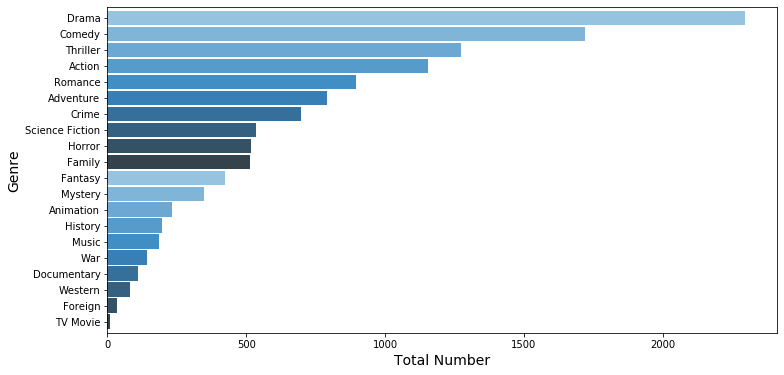

In [16]:
# create a plot to show top 10 popular genres
plt.subplots(figsize=(12, 6))
genres_sum.plot(kind='barh',width=0.9, color=sns.color_palette('Blues_d', 10))
plt.xlabel('Total Number',fontsize = 14)
plt.ylabel('Genre',fontsize = 14)

                                        Figure 1. Popular Genres

From Figure 2, we can see that there was a robust growth of movies produced in the late twentieth century. The amounts of drama and comedy significantly increased than other genres of movies. Despite slight fluctuations within each genre, the overall trend is the increase in movie making production. 

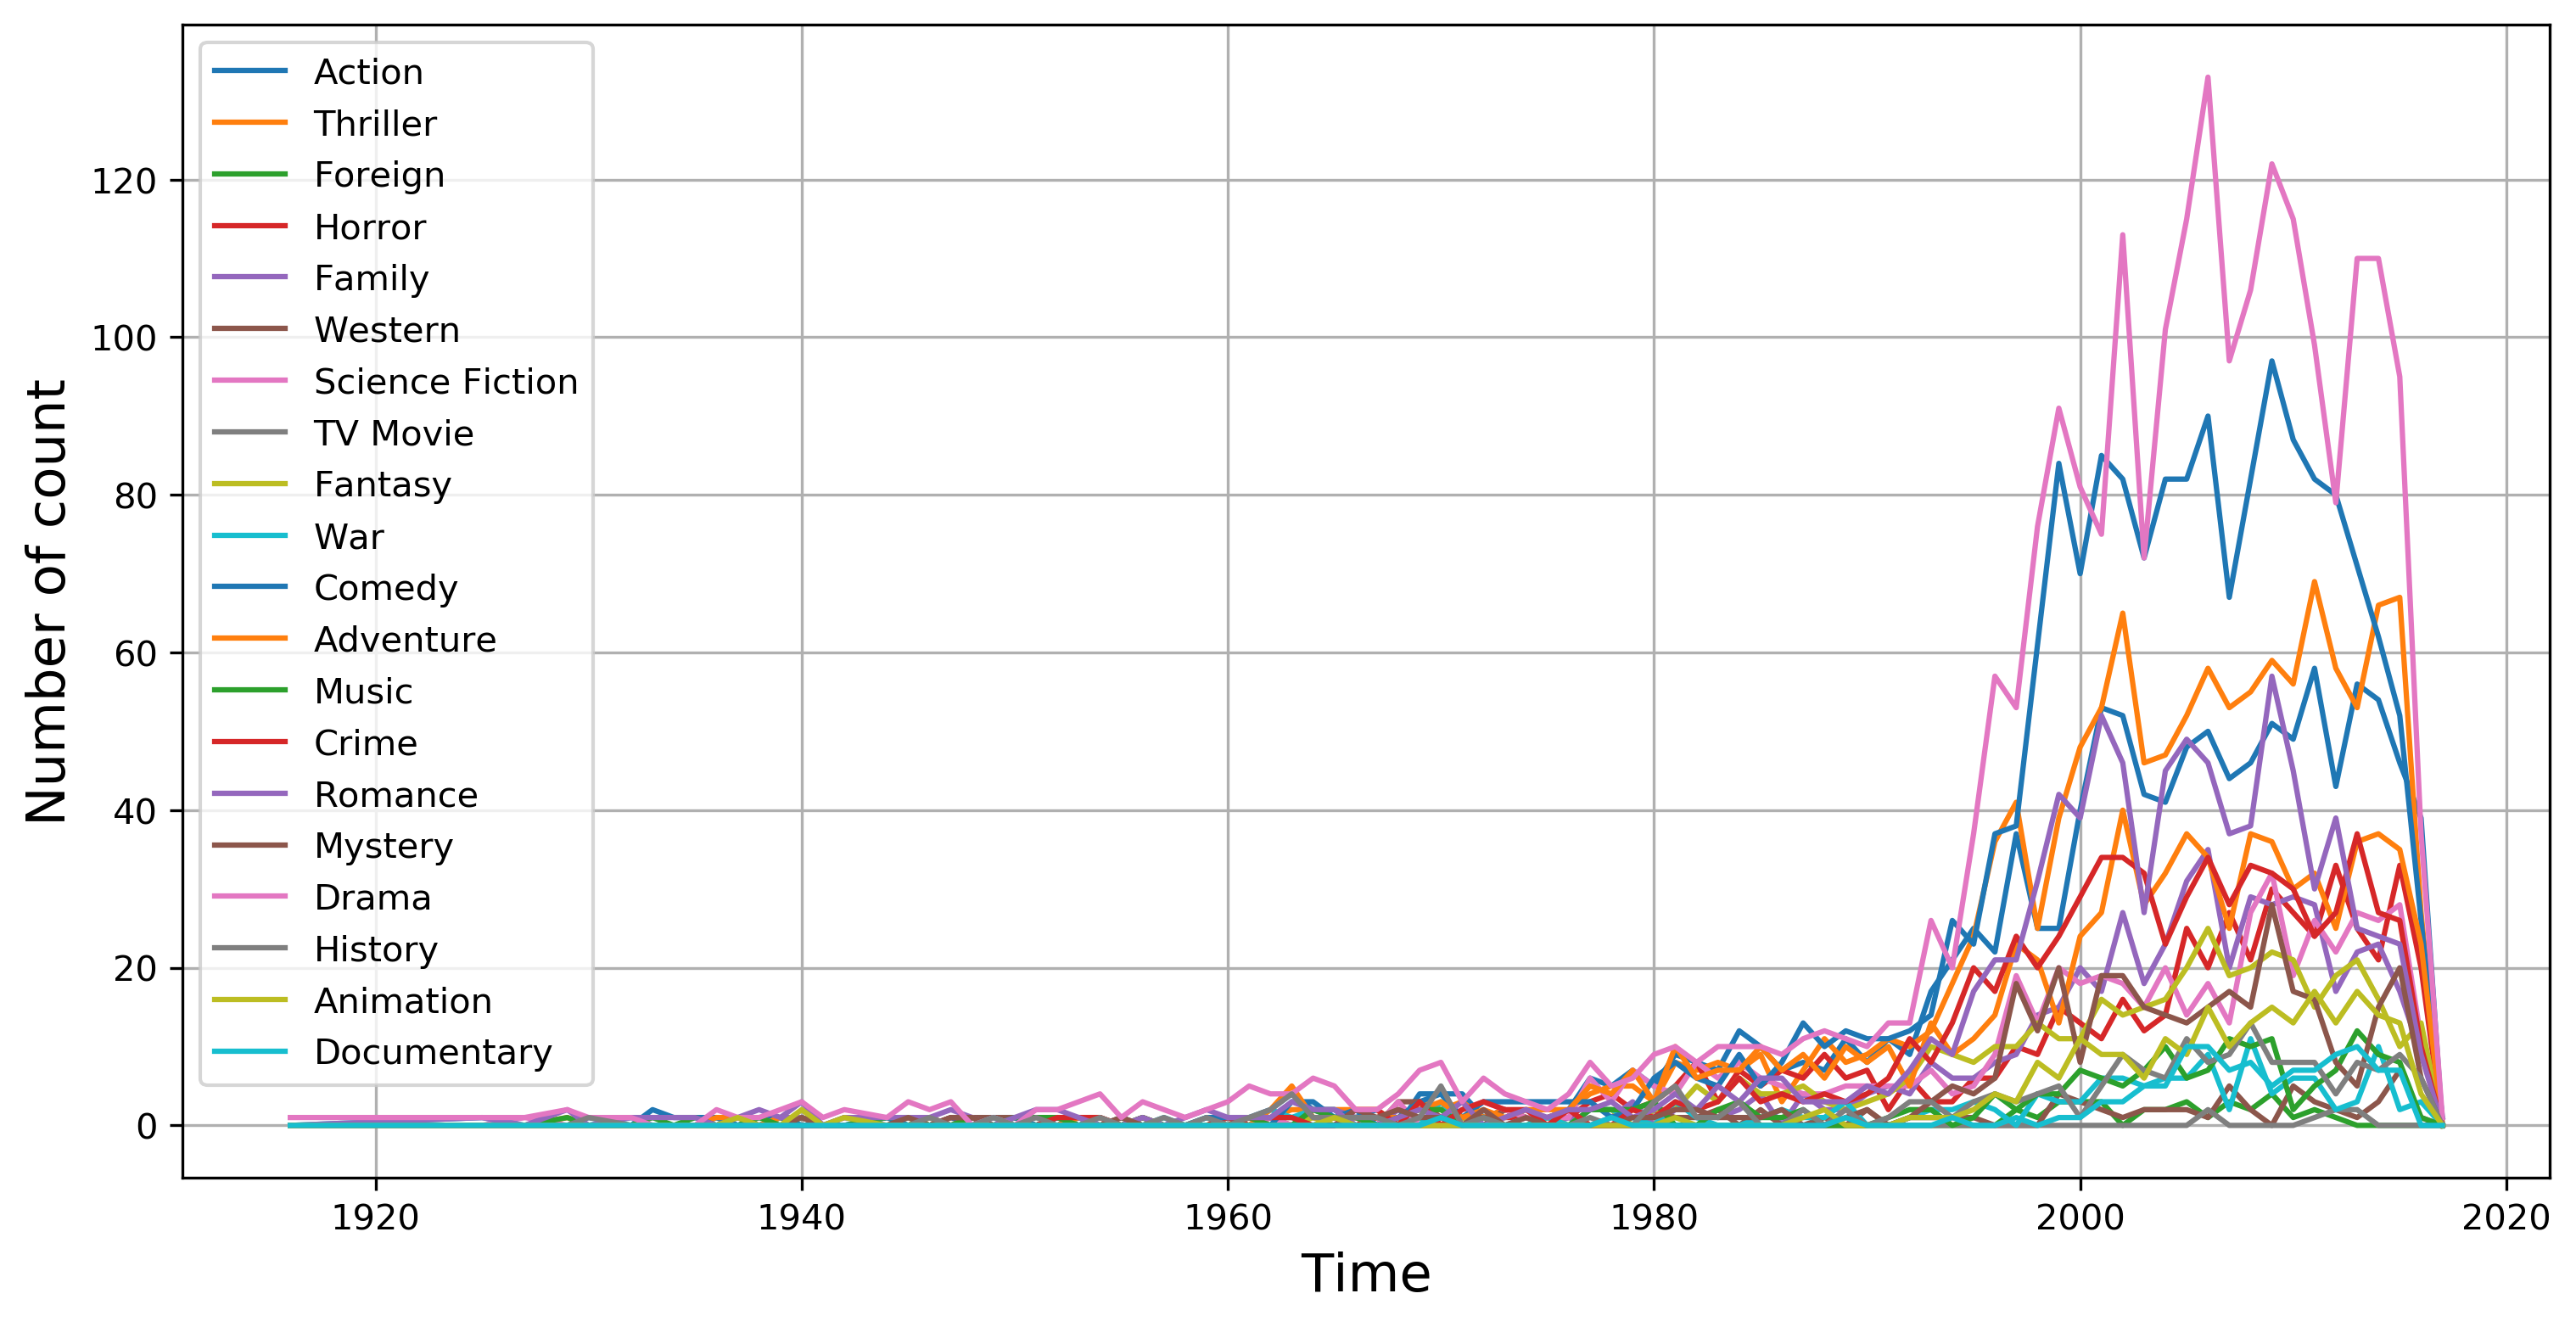

In [46]:
# create a plot to show the changes of trend
plt.figure(figsize=(12,6),edgecolor='red',dpi=300)
plt.plot(genresDf, label = genresDf.columns)
plt.legend(genresDf)
plt.xlabel('Time',fontsize = 15)
plt.ylabel('Number of count',fontsize = 15)
plt.grid(True)

                                     Figure 2. Changes of genres over time

We zoom in the general plot by extracting the top 6 genres and display their trends every five years (Figure 3). In addition to the long-term leading role in drama and comedy films, an interesting finding is that before the 21st century, the number of thriller movies was similar to that of action movies, or even less. However, since the beginning of the 21st century, the number of thriller movies has increased and maintained a steady gap with action movies.

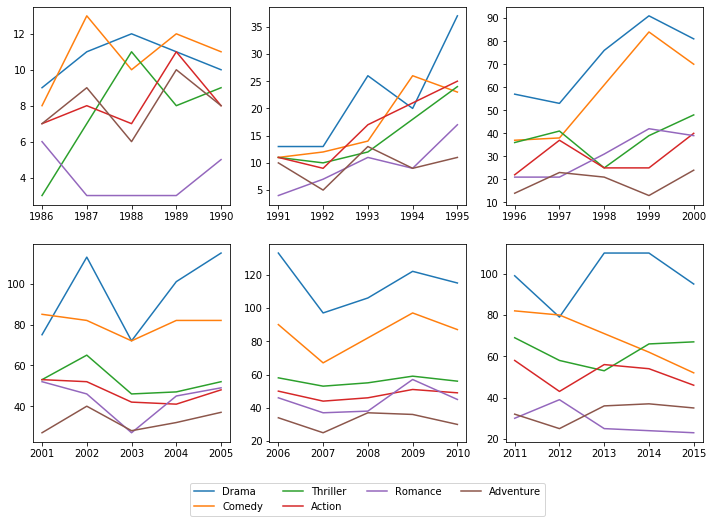

In [20]:
filmDf=genresDf[['Drama','Comedy','Thriller','Action','Romance','Adventure']]

X2015=filmDf.iloc[-7:-2]
X2010=filmDf.iloc[-12:-7]
X2005=filmDf.iloc[-17:-12]
X2000=filmDf.iloc[-22:-17]
X1995=filmDf.iloc[-27:-22]
X1990=filmDf.iloc[-32:-27]

plt.figure(23,figsize=(12,8))

plt.subplot(231)
plt.plot(X1990)

plt.subplot(232)
plt.plot(X1995)

plt.subplot(233)
plt.plot(X2000)

plt.subplot(234)
plt.plot(X2005)

plt.subplot(235)
plt.plot(X2010)

plt.subplot(236)
plt.plot(X2015)

plt.legend(filmDf, loc='lower center', ncol=4,bbox_to_anchor=(-0.7, -0.4))

        Figure 3. Changes of the top 6 genres over every five years (1985-2015)

##### Characteristics of different clustering groups based on four features

In the second part, after clustering all films into five groups, we can see from Table 1 that there are some differences between each group, and each group has certain unique features. For example, when we take a look at group 4, which has the highest ROI, its budget is relatively higher among the five groups, and it has the highest popularity as well as user rating. 

The characteristic of group 2 is surprising. You can see that it has the lowest budget. However, its user rating and ROI are not the least, even rank third among the five groups. This result inspires us that even though high investment indeed affects the success of a movie to some extent，you can still get an ideal ROI when the budget is limited.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

# rescale the unit of budget, revenue, profit, and ROI to million
fullData['budget']=fullData['budget']/1000000
fullData['revenue']=fullData['revenue']/1000000
fullData['profit']=fullData['profit']/1000000
fullData['ROI']=fullData['profit']/fullData['budget']

suc=fullData[['budget','popularity','vote_average','profit']]
target= np.array(suc[['budget','popularity','vote_average','profit']])

# stardardize the data
targetstd=StandardScaler().fit_transform(target)

In [25]:
# K-means clustering
kmeans=KMeans(n_clusters=5,random_state=0)
y_kmeans=kmeans.fit_predict(targetstd)
Counter(y_kmeans)
suc['predict label']=y_kmeans

# show the mean of features in a table
targetDf=round(suc.groupby('predict label').mean(),2)
targetDf.columns = ['budget','popularity','vote_average','profit']

Counter({3: 126, 1: 572, 4: 6, 0: 1647, 2: 2452})

In [47]:
targetDf['ROI']=targetDf['profit']/targetDf['budget']
targetDf.T.round(2)

predict label,0,1,2,3,4
budget,28.17,89.63,21.07,154.95,127.83
popularity,9.79,49.35,17.60,97.56,574.75
vote_average,5.18,6.44,6.73,6.91,7.25
profit,34.61,168.95,42.02,648.23,752.28
ROI,1.23,1.88,1.99,4.18,5.89


  Table 1. Mean values of clustering groups

#####  Prolific Actors and Profitable Actors

The top 10 prolific actors are shown in Figure 4. Samuel L. Jackson has appeared in the highest amount of movies. Other actors on the list are also widely known, such as Matt Damon, Liam Neeson, and Nicolas Cage. 

In [ ]:
# change the format of x axis which will be used on the third part
def format_number_for_axis(value, tick_number):
  if np.abs(value) >= 1000000000:
    return "{0}B".format(value / 1000000000)
  elif np.abs(value) >= 1000000:
    return "{0}M".format(value / 1000000)
  else:
    return value

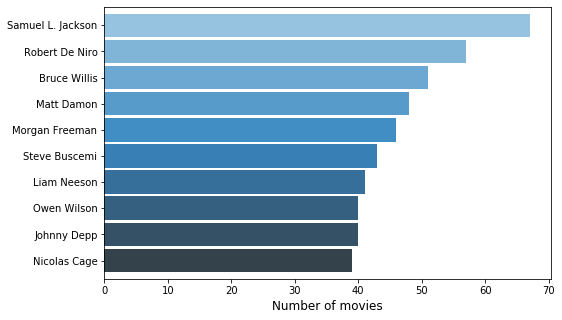

In [49]:
df = credits[['movie_id', 'title', 'cast']]
rows = []
df.apply(lambda row:[rows.append([row['movie_id'], row['title'], nn]) for nn in row['cast']], axis=1)
actors = pd.DataFrame(rows, columns=['movie_id', 'title', 'actor'])

df = actors.groupby(['actor'], as_index=False).size().reset_index(name='count')
df = df.sort_values('count', ascending=False).head(10)
df = df.sort_values('count', ascending=True)

df.plot(kind='barh', color=sns.color_palette('Blues_d', 10), legend=None, x='actor', y='count', width=0.9, figsize=(8,5))
plt.xlabel("Number of movies", fontsize=12)
plt.ylabel('')
plt.show() 

                  Figure 4. The Top 10 Prolific Actors 

We pick up Samuel Jackson (the most prolific), Johnny Depp (a popular actor among young people), and Nicolas Cage (one of the most influential legendary actors around the world). We then compare the spread of profits for the films they had made. Samuel indeed has participated in many blockbusters. Johnny Depp has plenty of movies which have a box office of about 750 million dollars. On the contrary, most of the movies Nicolas Cage participated in have a relatively lower box office, which is lower than 250 million dollars.

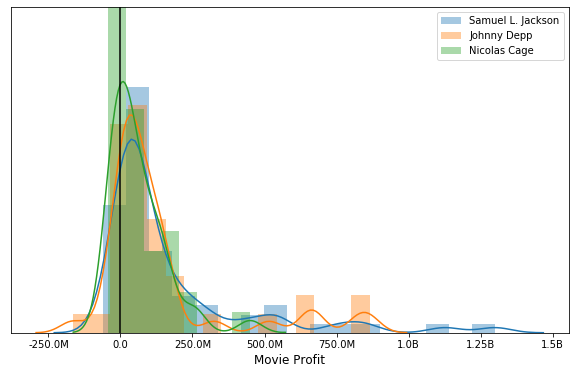

In [61]:
if 'movie_id' in actors.columns:
  actors = actors.drop(columns=['movie_id'])
if 'id' in movies.columns:
  movies = movies.drop(columns=['id'])

actors.set_index('title')
movies.set_index('title')

actor_movies = actors.merge(movies, how='inner')
actor_movies.dropna(subset=['profit'], inplace=True)

names = ["Samuel L. Jackson","Johnny Depp","Nicolas Cage"]

fig, ax = plt.subplots(figsize=(10, 6))

for name in names:
  series = actor_movies.loc[actor_movies['actor'] == name]['profit']
  sns.distplot(series, label=name)
  
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_number_for_axis))
plt.legend(loc='upper right')
plt.axvline(0, color='black')
plt.xlabel("Movie Profit", fontsize=12)
ax.yaxis.set_visible(False)
plt.ylabel("")
plt.show()

       Figure 5.  The Spread of Profits Earned by Selected Actors

The top 10 profitable actors are shown in Figure 6. It is astonishing that Stan Lee, father of Marvel Comics, pops up at the top of the list. As we have known, Stan Lee was a comic book writer, publisher, and producer, rather than a professional actor. However, his appearance in a movie can bring many profits.

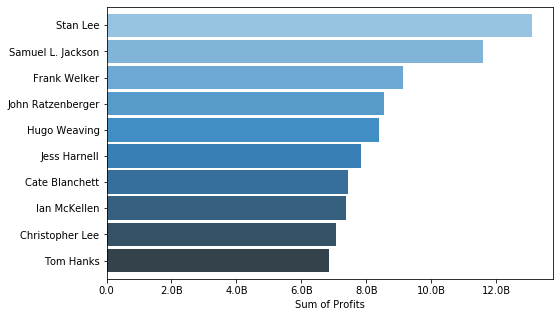

In [62]:
df = actor_movies[['profit', 'title', 'actor']]

df = df.groupby(['actor'], as_index=False).sum()
df = df.sort_values('profit', ascending=False).head(10)
df = df.sort_values('profit', ascending=True)

ax = df.plot(kind='barh', color=sns.color_palette('Blues_d', 10), legend=None, x='actor', y='profit', width=0.9, figsize=(8, 5))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_number_for_axis))
plt.ylabel('')
plt.xlabel('Sum of Profits')
plt.show()

                  Figure 6. The Top 10 Profitable Actors

Compared with all movies, we notice that movies containing Stan Lee have a higher average profit than the average profit of all movies. This result reflects that the appearance of some celebrities will, to some extent, increase the profit of a movie.

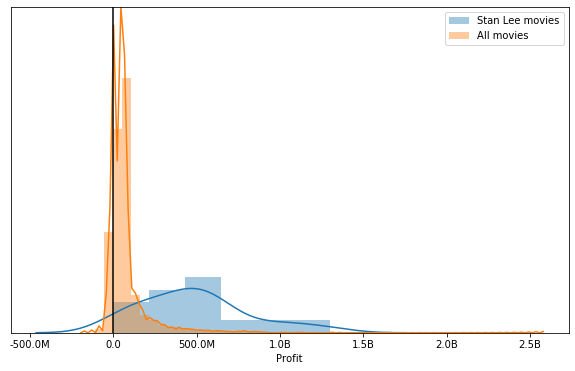

In [63]:
plt.subplots(figsize=(10, 6))

ax = sns.distplot(actor_movies.loc[actor_movies['actor'] == 'Stan Lee']['profit'], label='Stan Lee movies')
sns.distplot(movies['profit'], ax=ax, label='All movies')

plt.legend(loc='upper right')
plt.axvline(0, color='black')
plt.xlabel("Profit")
plt.ylabel("Number of Movies")
ax.yaxis.set_visible(False)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_number_for_axis))
plt.show()

    Figure 7. Comparison of profits between Stan Lee movies and all movies

### Conclusion 

The popularity and profitability of a movie are due to multiple factors, such as genre, budget, and actors. Drama and comedy films have a relatively high market share. If an investor wants to make an investment decision, investing in these two genres will have a relatively high probability of gaining high popularity. Also, the high budget of a movie means high risk, but once successful, the profits and ROI are huge, as well as the popularity. But high budget is not a necessary element to gain high user rating and profit. Lastly, actors are a critical factor in filmmaking. Even a single figure can significantly pull the box office. Thus, carefully considering each component of movie-making, it is relatively easier to gain popularity and profitability.

### Appendix

First, we observe the data and find that there are some abnormal values. We replace missing value or abnormal value with average values for four variables: budget, revenue, popularity, vote_average, and vote_count.

In [65]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,profit
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4.803000e+03
mean,3.531606e+07,21.496775,1.067008e+08,106.875859,6.172081,699.127736,7.138471e+07
std,3.790514e+07,31.815138,1.546419e+08,22.611935,0.966326,1232.060053,1.311667e+08
min,1.000000e+00,0.000372,5.000000e+00,0.000000,0.500000,1.000000,-1.657101e+08
25%,1.200000e+07,4.674558,2.760697e+07,94.000000,5.600000,59.000000,5.906108e+06
50%,2.904504e+07,12.928269,8.226064e+07,103.000000,6.200000,250.000000,5.321560e+07
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000,7.576064e+07
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09


For genres, we first extract different types of genres from each movie and then sort them by year.

In [67]:
genresDf

,Action,Thriller,Foreign,Horror,Family,Western,Science Fiction,TV Movie,Fantasy,War,Comedy,Adventure,Music,Crime,Romance,Mystery,Drama,History,Animation,Documentary
release_yearTime,,,,,,,,,,,,,,,,,,,,
1916.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1925.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1927.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1929.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,2,0,0,0
1930.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013.0,56,53,0,25,22,1,27,2,21,3,71,36,12,37,25,5,110,8,17,10
2014.0,54,66,0,21,23,3,26,0,16,10,62,37,9,27,24,15,110,7,14,7
2015.0,46,67,0,33,17,7,28,0,10,2,52,35,8,26,23,20,95,9,13,7


We count the total amount of every movie genre. 

In [66]:
# sum the total amount of each genre
genres_sum=genresDf.sum(axis=0).sort_values(ascending=True)
genres_sum

TV Movie              8
Foreign              34
Western              82
Documentary         110
War                 144
Music               185
History             197
Animation           234
Mystery             348
Fantasy             424
Family              513
Horror              519
Science Fiction     535
Crime               696
Adventure           790
Romance             894
Action             1154
Thriller           1274
Comedy             1722
Drama              2297
dtype: int64

We conduct a correlation test to see the correlation coefficient between variables. From the result, we can see that vote_average has a lower correlation with profit and popularity than vote_count. Thus, we choose vote_average as a feature of clustering to make the separation of different groups more obviously.

In [68]:
movies[['budget', 'vote_count', 'vote_average', 'runtime', 'popularity', 'profit']].cov()

,budget,vote_count,vote_average,runtime,popularity,profit
budget,1.436799e+15,2.593405e+10,5.758595e+05,1.927498e+08,5.524817e+08,2.636305e+15
vote_count,2.593405e+10,1.517972e+06,4.057471e+02,7.318656e+03,3.037490e+04,1.162499e+11
vote_average,5.758595e+05,4.057471e+02,9.337857e-01,7.671021e+00,8.705864e+00,2.309310e+07
runtime,1.927498e+08,7.318656e+03,7.671021e+00,5.112996e+02,1.617747e+02,5.291878e+08
popularity,5.524817e+08,3.037490e+04,8.705864e+00,1.617747e+02,1.012203e+03,2.396665e+09
profit,2.636305e+15,1.162499e+11,2.309310e+07,5.291878e+08,2.396665e+09,1.720470e+16


In [69]:
movies[['budget', 'vote_count', 'vote_average', 'runtime', 'popularity', 'profit']].corr()

,budget,vote_count,vote_average,runtime,popularity,profit
budget,1.000000,0.555316,0.015722,0.224864,0.458127,0.530242
vote_count,0.555316,1.000000,0.340800,0.262655,0.774906,0.719345
vote_average,0.015722,0.340800,1.000000,0.351045,0.283175,0.182194
runtime,0.224864,0.262655,0.351045,1.000000,0.224848,0.178385
popularity,0.458127,0.774906,0.283175,0.224848,1.000000,0.574315
profit,0.530242,0.719345,0.182194,0.178385,0.574315,1.000000


Text(0, 0.5, 'Profit')

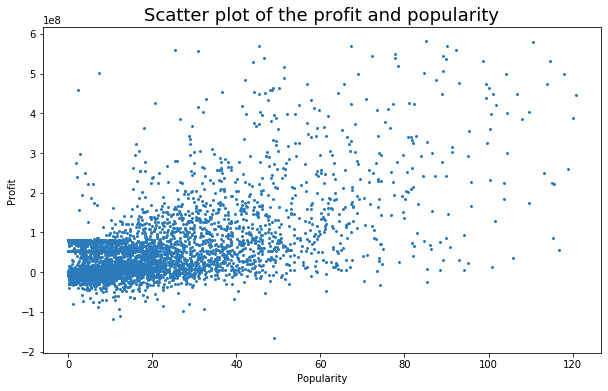

In [70]:
plt.subplots(figsize=(10, 6))
# Select the variables
df = movies[['popularity', 'profit']]
# Filter outliers, using 99th percentile values
df = df[df.popularity <= df.popularity.quantile(0.99)]
df = df[df.profit <= df.profit.quantile(0.99)]
# Create a scatter plot
plt.plot(df['popularity'], df['profit'], 'o', color=sns.color_palette("Blues")[4], markersize=2)
plt.title("Scatter plot of the profit and popularity", fontsize=18)
plt.xlabel("Popularity")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

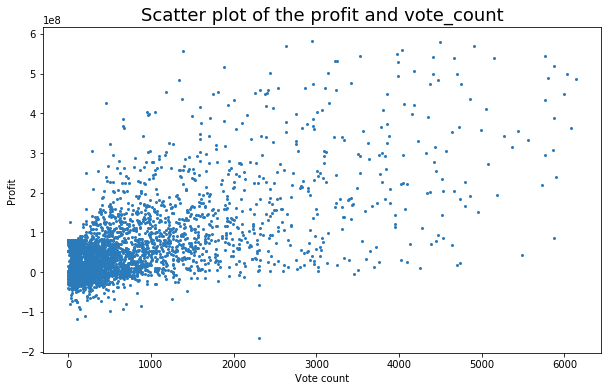

In [71]:
plt.subplots(figsize=(10, 6))
# Select the variables
df1 = movies[['vote_count', 'profit']]
# Filter outliers, using 99th percentile values
df1 = df1[df1.vote_count <= df1.vote_count.quantile(0.99)]
df1 = df1[df1.profit <= df1.profit.quantile(0.99)]
# Create a scatter plot
plt.plot(df1['vote_count'], df1['profit'], 'o', color=sns.color_palette("Blues")[4], markersize=2)
plt.title("Scatter plot of the profit and vote_count", fontsize=18)
plt.xlabel("Vote count")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

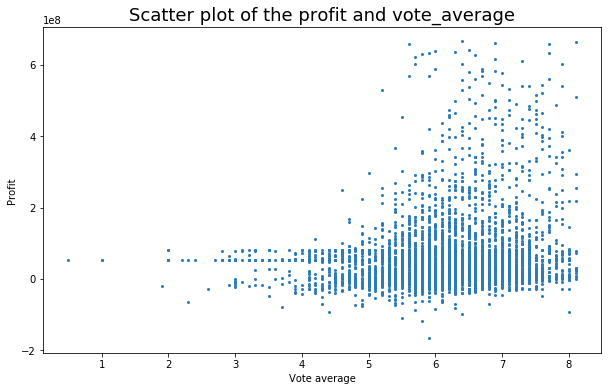

In [75]:
plt.subplots(figsize=(10, 6))
# Select the variables
df2 = movies[['vote_average', 'profit']]
# Filter outliers, using 99th percentile values
df2 = df2[df2.vote_average <= df2.vote_average.quantile(0.99)]
df2 = df2[df2.profit <= df2.profit.quantile(0.99)]
# Create a scatter plot
plt.plot(df2['vote_average'], df2['profit'], 'o', color=sns.color_palette("Blues")[4], markersize=2)
plt.title("Scatter plot of the profit and vote_average", fontsize=18)
plt.xlabel("Vote average")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

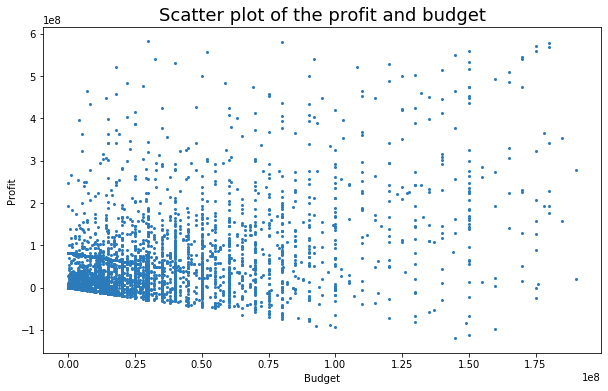

In [72]:
plt.subplots(figsize=(10, 6))
# Select the variables
df2 = movies[['budget', 'profit']]
# Filter outliers, using 99th percentile values
df2 = df2[df2.budget <= df2.budget.quantile(0.99)]
df2 = df2[df2.profit <= df2.profit.quantile(0.99)]
# Create a scatter plot
plt.plot(df2['budget'], df2['profit'], 'o', color=sns.color_palette("Blues")[4], markersize=2)
plt.title("Scatter plot of the profit and budget", fontsize=18)
plt.xlabel("Budget")
plt.ylabel("Profit")

/Users/wyw/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


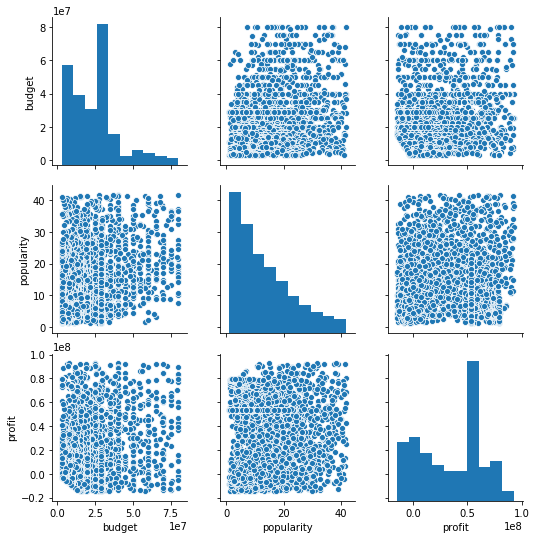

In [76]:
fields = ['budget', 'popularity', 'profit']
data = movies[fields]
# Filter outliers, using 90th percentile values
for f in fields:
    data = data[data[f] <= data[f].quantile(0.90)]
    data = data[data[f] >= data[f].quantile(0.10)]
sns.pairplot(data, size=2.5)
plt.show()

We use the elbow method to find the optimal number of clusters. We notice that the degree of reduction gradually decreases after five clusters. Thus, we choose five as our optimal number.

Text(0.5, 0, 'Number of clusters')

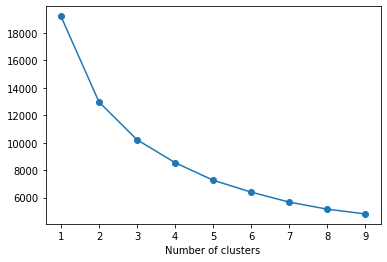

In [24]:
# find the optional number of clusters
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(targetstd)
    inertias.append(model.inertia_)
plt.plot(ks, inertias ,'-o')
plt.xlabel('Number of clusters')